In [ ]:
"""
to calculate the skin/whole ratio
"""

import sys
sys.path.insert(0, '..')

import pandas as pd
import pathlib
import numpy as np
import cv2
import csv

dataset = 'TLA'

data_dir = pathlib.Path('../data/') / dataset

if dataset == 'TLA':
    ad_pred_csv_dir = data_dir / f"metadata_ad_seg_pred_whole_base.csv"
    ad_csv = pd.read_csv(ad_pred_csv_dir)
else:
    ad_auto_csv_dir = data_dir / f"metadata_ad_seg_whole_base.csv"
    ad_auto_csv = pd.read_csv(ad_auto_csv_dir)
    ad_pred_csv_dir = data_dir / f"metadata_ad_seg_pred_whole_base.csv"
    ad_pred_csv = pd.read_csv(ad_pred_csv_dir)
    ad_csv = pd.concat([ad_auto_csv, ad_pred_csv])
    # ad_man_csv_dir = self.data_dir / f"metadata_ad_man_whole_seg.csv"
    # ad_man_csv = pd.read_csv(ad_man_csv_dir)
skin_auto_csv_dir = data_dir / f"metadata_skin_seg_whole_base.csv"
skin_auto_csv = pd.read_csv(skin_auto_csv_dir)
skin_pred_csv_dir = data_dir / f"metadata_skin_seg_pred_whole_base.csv"
skin_pred_csv = pd.read_csv(skin_pred_csv_dir)
skin_csv = pd.concat([skin_auto_csv, skin_pred_csv])
# skin_man_csv_dir = self.data_dir / f"metadata_skin_man_whole_seg.csv"
# skin_man_csv = pd.read_csv(skin_man_csv_dir)
meta_csv_dir = data_dir / f"metadata.csv"
meta_csv = pd.read_csv(meta_csv_dir)

csv_dir = data_dir / 'metadata_ratio.csv'
file = open(csv_dir, 'w', newline='')
writer = csv.writer(file)
writer.writerow(['refno', 'visno', 'ethnic', 'cra', 'dry', 'ery', 'exc', 'exu', 'lic', 'oed',
                 'filename', 'filepath', 'task', 'bd_reg_ori', 'bd_reg', 'height', 'width', 'ad_pc', 'skin_pc', 'bg_pc', 'ad_skin', 'skin_whole'])


filenames = [filepath for filepath in meta_csv['filename']]
length = len(filenames)
for i, fn in enumerate(filenames):
#     print(fn)
    ind = meta_csv.index[meta_csv['filename'] == fn].tolist()
    fp = meta_csv['filepath'].iloc[ind[0]]
    img = cv2.imread(fp)
    shape = np.shape(img)
    height = shape[0]
    width = shape[1]
    
    ad_ind = ad_csv.index[ad_csv['filename'] == fn].tolist()
    ad_fp = ad_csv['filepath'].iloc[ad_ind[0]]
    ad_seg = cv2.imread(ad_fp)
    ad_seg = cv2.cvtColor(ad_seg, cv2.COLOR_BGR2GRAY)
    ad = ad_seg > 0
    skin_ind = skin_csv.index[skin_csv['filename'] == fn].tolist()
    skin_fp = skin_csv['filepath'].iloc[skin_ind[0]]
    skin_seg = cv2.imread(skin_fp)
    skin_seg = cv2.cvtColor(skin_seg, cv2.COLOR_BGR2GRAY)
    skin = skin_seg > 0
    
    size = np.size(ad)
#     ad_size = np.sum(ad)
    ad_size = np.sum(skin*2 - ad == 1)
#     print(np.sum(ad))
#     print(ad_size)
    skin_size = np.sum(skin)
    bg_size = size - skin_size
    skin_size = skin_size - ad_size
    ad_pc = ad_size/size * 100
    skin_pc = skin_size/size * 100
    bg_pc = bg_size/size * 100
    ad_skin = ad_size / (ad_size+skin_size) * 100
    skin_whole = (ad_size+skin_size) / size * 100
    
    writer.writerow([
        meta_csv['refno'].iloc[ind[0]], meta_csv['visno'].iloc[ind[0]],
        meta_csv['ethnic'].iloc[ind[0]],
        int(meta_csv['cra'].iloc[ind[0]]),
        int(meta_csv['dry'].iloc[ind[0]]),
        int(meta_csv['ery'].iloc[ind[0]]),
        int(meta_csv['exc'].iloc[ind[0]]),
        int(meta_csv['exu'].iloc[ind[0]]),
        int(meta_csv['lic'].iloc[ind[0]]),
        int(meta_csv['oed'].iloc[ind[0]]),
        fn, fp, meta_csv['task'].iloc[ind[0]], 
        meta_csv['bd_reg_ori'].iloc[ind[0]], meta_csv['bd_reg'].iloc[ind[0]],
        height, width, ad_pc, skin_pc, bg_pc, ad_skin, skin_whole,
        ])
    
    print(f"{i}/{length} {fp}")

file.close()


      Percentage      Region
0       0.639725          AD
1       5.486933          AD
2       3.662872          AD
3       9.973780          AD
4      14.872996          AD
...          ...         ...
997    18.302536  Background
998    49.142838  Background
999    49.209849  Background
1000   56.483587  Background
1001   53.040314  Background

[3006 rows x 2 columns]
      Percentage       Ratio
0       1.378420     AD/Skin
1      24.401154     AD/Skin
2      12.245991     AD/Skin
3      52.700288     AD/Skin
4      64.262443     AD/Skin
...          ...         ...
997    81.697464  Skin/Whole
998    50.857162  Skin/Whole
999    50.790151  Skin/Whole
1000   43.516413  Skin/Whole
1001   46.959686  Skin/Whole

[2004 rows x 2 columns]


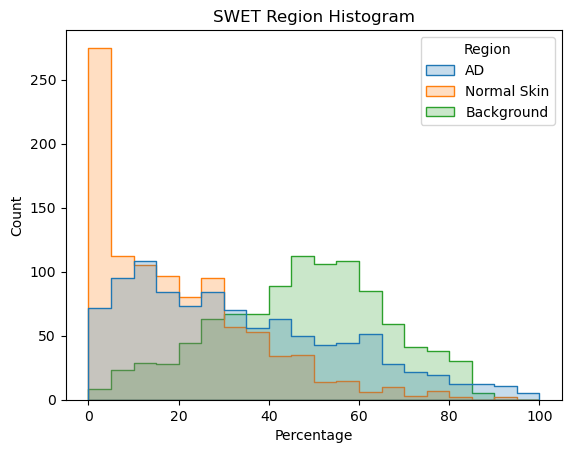

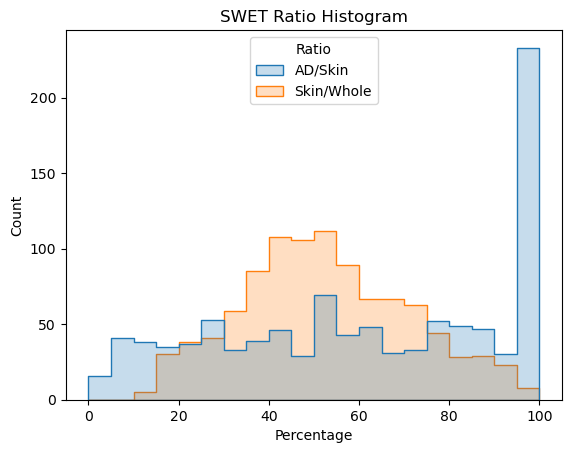

In [1]:
## plot

import pandas as pd
import pathlib
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

dataset = 'SWET'

data_dir = pathlib.Path('../data/') / dataset

meta_csv_dir = data_dir / f"metadata_ratio.csv"
meta_csv = pd.read_csv(meta_csv_dir)

ad_pc = [val for val in meta_csv['ad_pc']]
skin_pc = [val for val in meta_csv['skin_pc']]
bg_pc = [val for val in meta_csv['bg_pc']]

ad_pc = np.array(ad_pc)
skin_pc = np.array(skin_pc)
bg_pc = np.array(bg_pc)

ad = ["AD"] * len(ad_pc)
skin = ["Normal Skin"] * len(skin_pc)
bg = ["Background"] * len(bg_pc)

d1 = pd.DataFrame({'Percentage': ad_pc, 'Region': ad})
d2 = pd.DataFrame({'Percentage': skin_pc, 'Region': skin})
d3 = pd.DataFrame({'Percentage': bg_pc, 'Region': bg})
d = pd.concat([d1, d2, d3])
print(d)
df = pd.DataFrame(data=d)

plt.figure()
pc_plot = sns.histplot(data=df, binwidth=5, binrange=[0,100], x="Percentage", hue="Region", element="step")

plt.title(dataset+' Region Histogram')

# ad_skin_pc = ad_pc / (ad_pc+skin_pc) * 100
# fg_bg_pc = (ad_pc+skin_pc) / (ad_pc+skin_pc+bg_pc) * 100

ad_skin_pc = [val for val in meta_csv['ad_skin']]
skin_whole_pc = [val for val in meta_csv['skin_whole']]

ad_skin_pc = np.array(ad_skin_pc)
skin_whole_pc = np.array(skin_whole_pc)

ad_skin = ["AD/Skin"] * len(ad_skin_pc)
skin_whole = ["Skin/Whole"] * len(skin_whole_pc)

d1 = pd.DataFrame({'Percentage': ad_skin_pc, 'Ratio': ad_skin})
d2 = pd.DataFrame({'Percentage': skin_whole_pc, 'Ratio': skin_whole})
d = pd.concat([d1, d2])
print(d)
df = pd.DataFrame(data=d)

plt.figure()
rt_plot = sns.histplot(data=df, binwidth=5, binrange=[0,100], x="Percentage", hue="Ratio", element="step") #element="poly"
sns.move_legend(rt_plot, "upper center")

plt.title(dataset+' Ratio Histogram')
plt.rcParams.update({'font.size': 13})
plt.rcParams["figure.figsize"] = (7,5)
#         plt.tight_layout()
plt.show()


<Figure size 3000x1000 with 0 Axes>

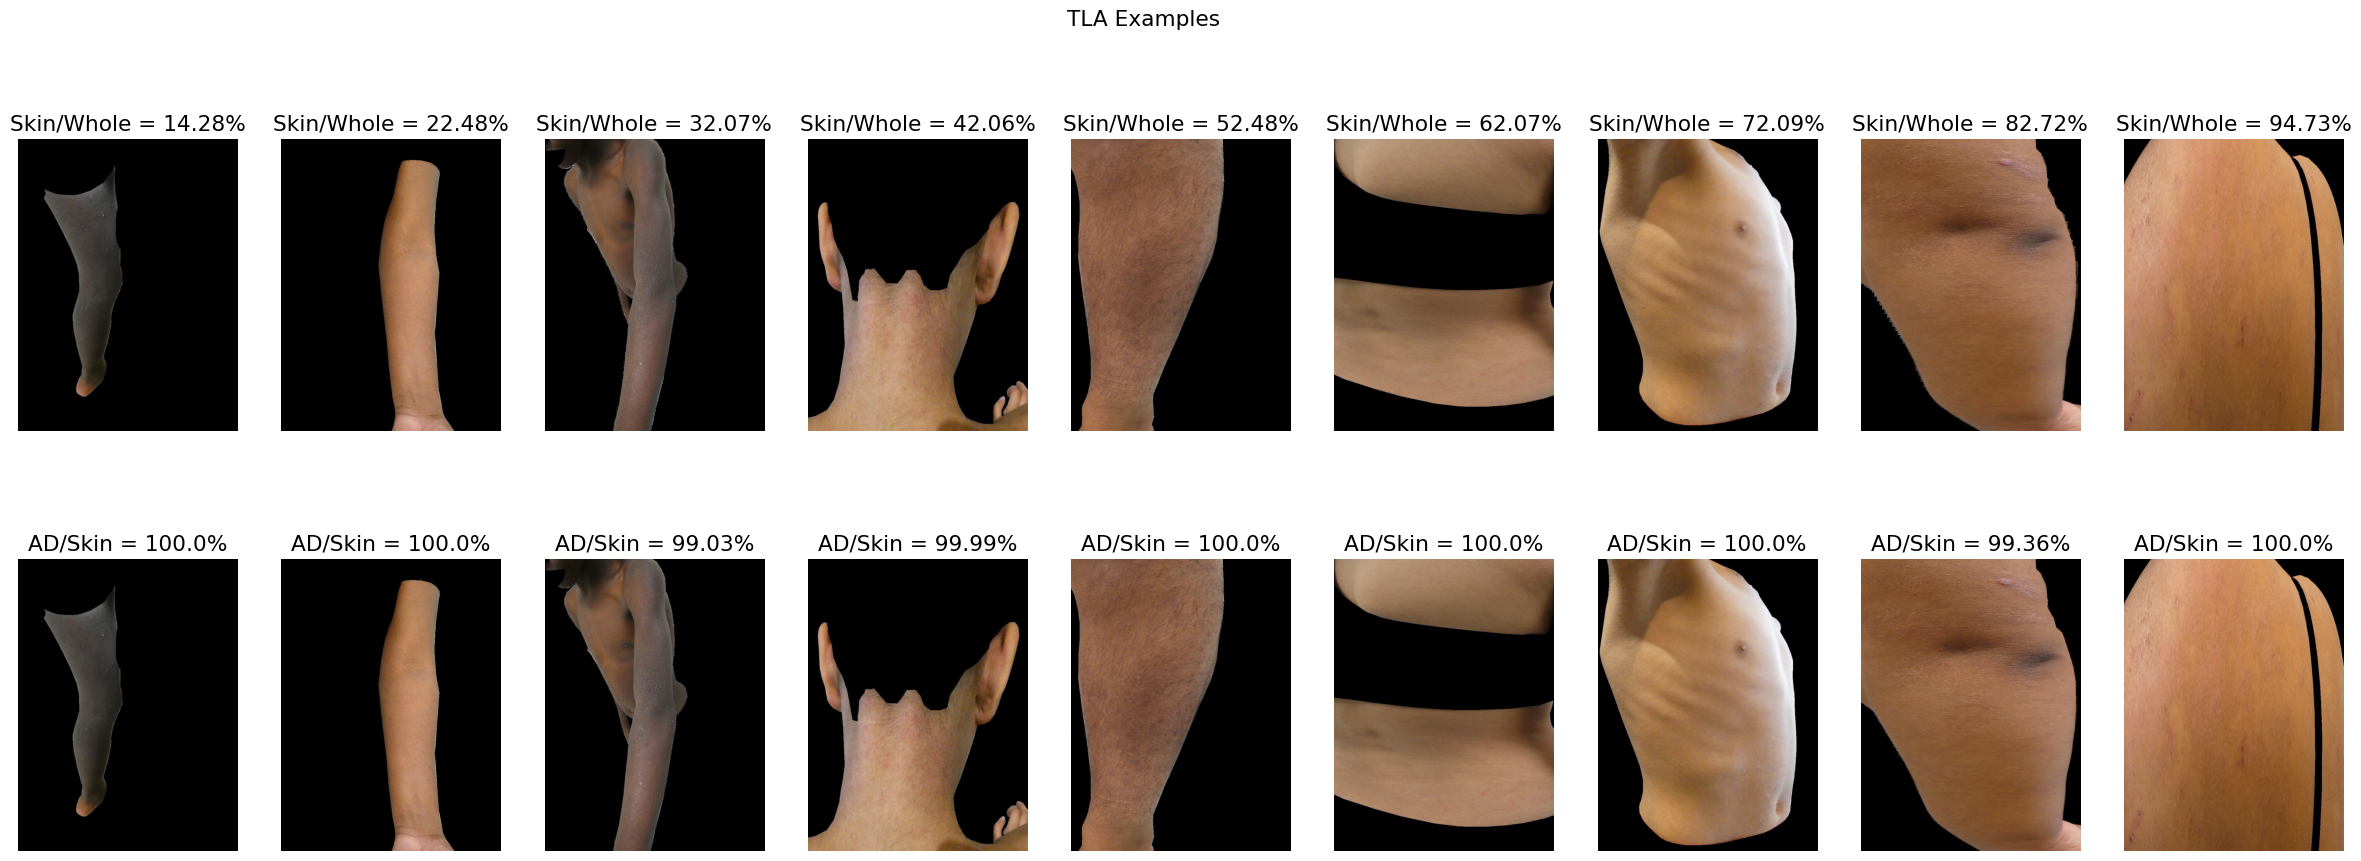

In [3]:
## demonstrate

import pandas as pd
import pathlib
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

dataset = 'TLA'

data_dir = pathlib.Path('../data/') / dataset

meta_csv_dir = data_dir / f"metadata_ratio.csv"
meta_csv = pd.read_csv(meta_csv_dir)
skin_csv_dir = data_dir / f"metadata_ratio.csv"
skin_csv = pd.read_csv(meta_csv_dir)

meta_csv = meta_csv.rename(columns={"ad_skin": "AD/Skin", "skin_whole": "Skin/Whole", "bg_reg": "Body Region"})

counts, bins = np.histogram(meta_csv["Skin/Whole"], bins=range(0, 101, 10))

plt.rcParams.update({'font.size': 13})
# plt.rcParams["figure.figsize"] = (70,10)
plt.rcParams["figure.figsize"] = (30,10)
plt.tight_layout()

fig, axs = plt.subplots(2, np.count_nonzero(counts))
fig.suptitle(dataset+' Examples')

i = 0
for c, b in zip(counts, bins):
    if c > 0:
        min_val = meta_csv.loc[meta_csv["Skin/Whole"] > b+2, "Skin/Whole"].min()
        data = meta_csv[meta_csv["Skin/Whole"] == min_val].iloc[0]
#         print(data)
        skin_whole = data["Skin/Whole"]
        ad_skin = data["AD/Skin"]
        fn = data['filename'][:-4]+'_whole.jpg'
        task = data['task']
#         print(f'{fn} {skin_whole} {ad_skin}')
        
        skin_img = plt.imread(str(data_dir / task / 'seg_skin_whole_base' / fn))
        axs[0,i].imshow(skin_img)
        axs[0,i].set_title(f"Skin/Whole = {round(skin_whole, 2)}%")
        axs[0,i].axis('off')
        
        ad_img = plt.imread(str(data_dir / task / 'seg_ad_whole_base' / fn))
        axs[1,i].imshow(ad_img)
        axs[1,i].set_title(f"AD/Skin = {round(ad_skin, 2)}%")
        axs[1,i].axis('off')
        
        i += 1
        
plt.show()


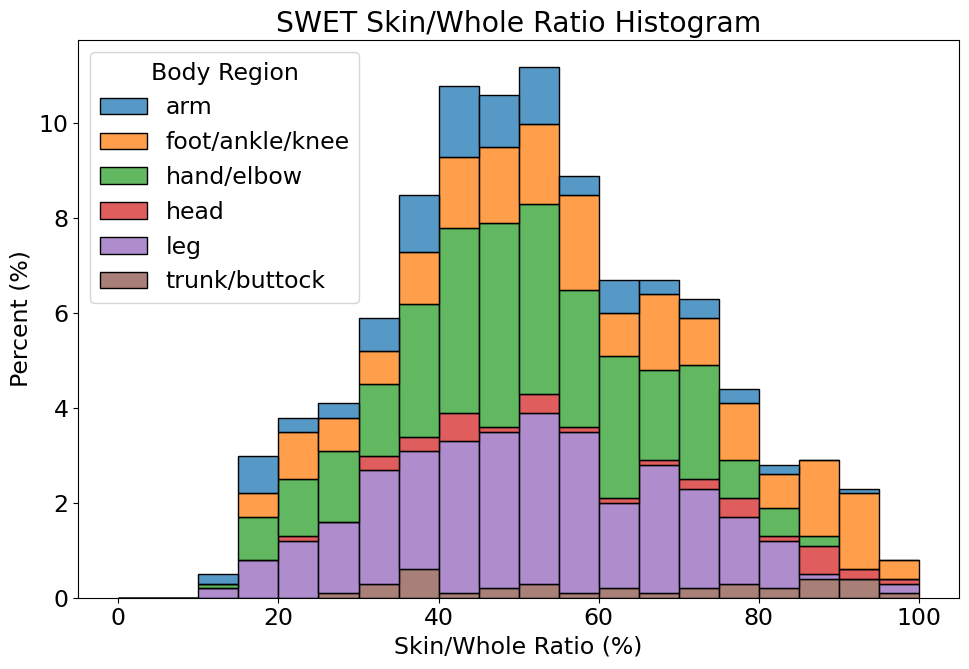

In [11]:
## plot with body regions

import pandas as pd
import pathlib
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

dataset = 'SWET'

data_dir = pathlib.Path('../data/') / dataset

meta_csv_dir = data_dir / f"metadata_ratio.csv"
meta_csv = pd.read_csv(meta_csv_dir)

skin_whole_pc = [val for val in meta_csv['skin_whole']]
bd_reg = [val for val in meta_csv['bd_reg']]

ad_skin = ["AD/Skin"] * len(ad_skin_pc)
df = pd.DataFrame({'Percentage': skin_whole_pc, 'Body Region': bd_reg})
df = df.sort_values(by=['Body Region'])

plt.figure()
rt_plot = sns.histplot(data=df, binwidth=5, binrange=[0,100], stat = 'percent', x="Percentage", hue="Body Region", multiple="stack") #element="poly"
# sns.move_legend(rt_plot, "upper center")

plt.title(dataset+' Skin/Whole Ratio Histogram')
plt.xlabel('Skin/Whole Ratio (%)')
plt.ylabel('Percent (%)')
plt.rcParams.update({'font.size': 17})
plt.rcParams["figure.figsize"] = (10,7)
plt.tight_layout()
plt.show()